In [1]:
import os
import json
import gensim 
import numpy as np
import csv
# from gensim.corpora import Dictionary
# from gensim.models import TfidfModel, OkapiBM25Model
from rank_bm25 import BM25Okapi
from nltk.tokenize import RegexpTokenizer
from tqdm import tqdm
import math
import random

In [12]:
docs = []
doc_ids = []
doc_mapping = {}
# with open('./small_dataset.jsonl','r') as f:
with open('./data/dataset.jsonl','r') as f:
    for i, line in tqdm(enumerate(f)):
        line=json.loads(line)
        combined_doc = line['ids']
        for article in line['docs']:
            combined_doc.append(article[1]+article[2]) #article should be in form [doi,title,abstract or full text]
        doc_mapping[int(line['object_number'])] = {
            "object_main_id":line['object_main_id'],
            "ra":line['ra'],
            "dec":line['dec'],
            "mag":line['mag'],
            "o_type":line['o_type'],
            "ids": line['ids'],
            "docs": line['docs']
        }
        docs.append(' '.join(combined_doc))
        doc_ids.append(int(line['object_number']))

12972it [00:01, 9634.58it/s] 


In [3]:
# print(docs[0])
# print(doc_ids[0])
print(doc_mapping[6862])

{'object_main_id': '* ksi UMa', 'ra': '11 18 10.9318', 'dec': '+31 31 45.440', 'mag': 3.7899999618530273, 'ids': ['* ksi UMa', '*  53 UMa', '** STF 1523AB', '** WTE    1A', 'ADS  8119 AB', 'AKARI-IRC-V1 J1118109+313147', 'ASCC  585912', 'BD+32  2132', 'CCDM J11182+3132AB', 'Ci 20  627', 'CSI+32  2132  3', '2E 1115.4+3148', '2E  2440', '1ES 1115+31.8', '2EUVE J1118+31.5', 'EUVE J1118+31.5', 'EUVE J1118+31.4', 'GC 15537', 'GEN# +1.00098231', 'HIC  55203', 'HIP 55203', 'IDS 11128+3206 AB', 'IRAS 11154+3148', 'IRC +30229', 'JP11  2046', '2MASS J11181100+3131464', 'N30 2652', 'NAME Alula Australis', 'NSV  5165', 'PLX 2625', 'PLX 2625.00', 'PMSC 11128+3205', 'RBS   961', '2RE J1118+313', '2RE J111810+313143', 'RE J111810+313153', 'RE J1118+313', 'RX J1118.1+3131', 'RX J1118.1+3130', '1RXS J111811.1+313154', 'SAO  62484', 'SKY# 21520', 'TD1 15519', 'TIC 144294174', 'UBV   10288', 'UBV M  16962', 'UCAC3 244-100191', 'UCAC4 608-048190', 'USNO-B1.0 1215-00188948', 'uvby98 100098230', 'V* ksi UMa

In [4]:
tokenized =[]
tokenizer = RegexpTokenizer('\\w+')
for doc in docs:
  tokens = tokenizer.tokenize(doc)
  tokens = [token.lower() for token in tokens]
  tokenized.append(tokens)
 
print(tokenized[0])

['hd', '200253', 'ag', '35', '2138', 'akari', 'irc', 'v1', 'j2101128', '360133', 'bd', '35', '4357', 'fk5', '3677', 'gc', '29350', 'gcrv', '13205', 'gen', '1', '00200253', 'gsc', '02713', '02875', 'hic', '103734', 'hip', '103734', 'hr', '8051', 'iras', '20592', '3550', '2mass', 'j21011286', '3601335', 'ppm', '85878', 'sao', '70794', 'sky', '39941', 'tic', '269574159', 'tyc', '2713', '2875', '1', 'ubv', 'm', '25373', 'web', '18879', 'gaia', 'dr2', '1871257194353687552', 'gaia', 'dr3', '1871257194353687552', 'final', 'design', 'and', 'on', 'sky', 'testing', 'of', 'the', 'ilocater', 'sx', 'acquisition', 'camera', 'broad', 'band', 'single', 'mode', 'fibre', 'coupling', 'jats', 'title', 'abstract', 'jats', 'title', 'jats', 'p', 'enabling', 'efficient', 'injection', 'of', 'light', 'into', 'single', 'mode', 'fibres', 'smfs', 'is', 'a', 'key', 'requirement', 'in', 'realizing', 'diffraction', 'limited', 'astronomical', 'spectroscopy', 'on', 'ground', 'based', 'telescopes', 'smf', 'fed', 'spectr

In [5]:
bm25 = BM25Okapi(tokenized)

In [6]:
def get_top_n_docs_for_query(query,n=50):
    query=query.lower()
    tokenized_query=tokenizer.tokenize(query)
    scores = bm25.get_scores(tokenized_query)
    result = sorted(zip(doc_ids, scores), key=lambda x: x[1], reverse=True)
    return result[:n]

In [7]:
print(get_top_n_docs_for_query("Andromeda",5))

[(6213, 7.677262913029437), (6193, 7.610235228425922), (8120, 6.994129624406422), (10967, 6.8857182628280365), (281, 6.6902082520591115)]


In [8]:
queries = [
    "where is the andromeda galaxy",
    "show me the nearest star to the north star",
    "where is the nearest star",
    "what is the closest star to the north star",
    "show galaxies visible from the northern hemisphere",
    "visible galaxies",
    "the brightest star",
    "stars closest to the andromeda galaxy",
    "easiest to see galaxy",
    "nebula",
    "largest galaxy",
    "brightest object",
    "binary stars",
    "galaxies",
    "stars nearest to the earth",
    "biggest star",
    "nebula closest to the earth",
    "galaxies near to the milky way",
    "brightest galaxies",
    "strangest objects I can see",
    "objects I can see without a telescope",
    "pulsar",
    "galaxy",
    "binary stars that are closest to the north star",
    "stars that look blue",
    "the andromeda galaxy",
    "Sirius",
    "galaxies similar to the milky way",
    "Stars as bright as Verga",
    "Messier Objects"
]
print(len(queries))

30


In [14]:
from astropy.coordinates import SkyCoord
import astropy.units as u
test_query = queries[12]
print(test_query)
# doc_mapping[int(line['object_number'])] = {
#             "object_main_id":line['object_main_id'],
#             "ra":line['ra'],
#             "dec":line['dec'],
#             "mag":line['mag'],
#             # "o_type":line['o_type'],
#             "ids": line['ids'],
#             "docs": line['docs']
#         }
results = get_top_n_docs_for_query(test_query,75)
for id,score in results:
    ra = doc_mapping[id]['ra']
    dec = doc_mapping[id]['dec']

    object_coords = SkyCoord(ra=[ra], dec=[dec], 
                                unit=(u.hourangle, u.deg), frame='icrs')
    
    target_coords = SkyCoord(ra=['14 39 36.5'], dec=['-60 50 50.02'], 
                                unit=(u.hourangle, u.deg), frame='icrs')
    
    print("id :: ",id)
    print("separation :: ",object_coords.separation(target_coords))
    print("type :: ",doc_mapping[id]['o_type'])
    print("magnitude :: ",doc_mapping[id]['mag'])
    print("names :: ",doc_mapping[id]['ids'])
    print()


binary stars
id ::  12314
separation ::  [20d56m43.21198877s]
type ::  EclBin
magnitude ::  5.494999885559082
names ::  ['HD 135876', 'CD-40  9496', 'CEL   4362', 'CPC  0 13183', 'CPD-40  6909', 'GC 20566', 'GCRV  8847', 'GEN# +1.00135876', 'GSC 07826-03079', 'HIC  74950', 'HIP 74950', 'HR  5687', '2MASS J15185637-4047176', 'N30 3443', 'PPM 320452', 'ROT  2166', 'SAO 225647', 'SKY# 27737', 'SSTc2d J151856.2-404717', 'SV* BV   448', 'TD1 18106', 'TIC 148158540', 'TYC 7826-3079-1', 'UBV   13175', 'UBV M  20671', 'uvby98 100135876', 'V* GG Lup', 'WEB 12787', '[B10]  3892', 'Gaia DR2 6005849243285423104', 'Gaia DR3 6005849243285423104', 'The Mass–Temperature Relation for B and Early A Stars Based on International Ultraviolet Explorer Spectra of Detached Eclipsing Binaries<jats:title>Abstract</jats:title>\n               <jats:p>Ultraviolet spectra were taken of 25 detached eclipsing binaries (DEBs) with spectral types O, B, and early A with the International Ultraviolet Explorer satellite 

In [106]:

with open("queries.csv",'w') as f:
    f.write("query,doc,rel")
    f.write('\n')
    for query in queries:
        results = get_top_n_docs_for_query(query,50)
        for id,score in results:
            f.write(query+",")
            f.write(str(id)+",")
            f.write("\n")
            

In [10]:
#metric functions
def map_score(search_result_relevances: list[int], cut_off=10) -> float:
    """
    Calculates the mean average precision score given a list of labeled search results, where
    each item in the list corresponds to a document that was retrieved and is rated as 0 or 1
    for whether it was relevant.

    Args:
        search_results: A list of 0/1 values for whether each search result returned by your 
                        ranking function is relevant
        cut_off: The search result rank to stop calculating MAP. The default cut-off is 10;
                 calculate MAP@10 to score your ranking function.

    Returns:
        The MAP score
    """
    # TODO: Implement MAP
    score=0
    i=0
    correct=0
    precision = 1
    relavent = sum(search_result_relevances) #number of relavent docs
    if relavent ==0:
        return 0
    while i<min(cut_off,relavent):
        
        if search_result_relevances[i]==1:
            correct+=1
            precision = correct/(1+i)
            score += precision
        i+=1
        

    
    score = score/min(cut_off,relavent)
    

    return score
    


def ndcg_score(search_result_relevances: list[float], 
               ideal_relevance_score_ordering: list[float], cut_off=10):
    """
    Calculates the normalized discounted cumulative gain (NDCG) given a lists of relevance scores.
    Relevance scores can be ints or floats, depending on how the data was labeled for relevance.

    Args:
        search_result_relevances: 
            A list of relevance scores for the results returned by your ranking function in the
            order in which they were returned. These are the human-derived document relevance scores,
            *not* the model generated scores.
            
        ideal_relevance_score_ordering: The list of relevance scores for results for a query, sorted by relevance score in descending order.
            Use this list to calculate IDCG (Ideal DCG).

        cut_off: The default cut-off is 10.

    Returns:
        The NDCG score
    """
    # TODO: Implement NDCG

    dcg=search_result_relevances[0]
    idcg=ideal_relevance_score_ordering[0]
    number_of_results = min(len(search_result_relevances),cut_off)
    for i in range(number_of_results-1):
        dcg+= search_result_relevances[1+i]/math.log(i+2,2)
    for i in range(number_of_results-1):
        idcg+= ideal_relevance_score_ordering[1+i]/math.log(i+2,2)

    ndcg = dcg/idcg
    return ndcg

In [107]:

bm25_map=[]
bm25_ndcg=[]

random_map=[]
random_ndcg=[]

In [110]:


score_list =[5,4,3,1,3,1,2,4,2,1,3,3,2,1,4,2,1,1,4,4,1,1,1,1,1,1,1,3,1,3,3,1,1,1,3,1,1,1,1,3,1,1,1,3,1,3,1,1,2,1]
# score_list =[4,2,2,1,1,2,4,2,3,4,2,1,2,1,4,2,1,1,1,1,1,1,5,1,1,1,1,2,3,4,2,3,2,2,1,1,4,1,2,4,3,4,5,4,1,2,4,2,1,1]
binary_score_list = [0 if i <4 else 1 for i in score_list]
sorted_scores=score_list.copy()
sorted_scores.sort(reverse=True)
random_list = score_list.copy()
random.shuffle(random_list)
random_binary_list = [0 if i <4 else 1 for i in random_list]
# print(random_list)

In [111]:


bm25_map.append( map_score(binary_score_list))
bm25_ndcg.append(ndcg_score(score_list,sorted_scores))

n = 50
# random_map=0
# random_ndcg=0
rm=0
rn=0
for i in range(n):
    random.shuffle(random_list)
    random_binary_list = [0 if i <4 else 1 for i in random_list]
    rm += map_score(random_binary_list)
    rn += ndcg_score(random_list,sorted_scores)

rm/=n
rn/=n

random_map.append(rm)
random_ndcg.append(rn)
print(bm25_map,bm25_ndcg)
print(random_map,random_ndcg)


[0.15857142857142856, 0.3333333333333333] [0.5738232819920416, 0.7748852662889422]
[0.09670079365079363, 0.07155555555555554] [0.4894793246278685, 0.5039549528114291]


    Model variable     value
0  Random      Map  0.096701
0  Random      Map  0.071556
1    BM25      Map  0.158571
1    BM25      Map  0.333333
2  Random     NDCG  0.489479
2  Random     NDCG  0.503955
3    BM25     NDCG  0.573823
3    BM25     NDCG  0.774885


<Axes: xlabel='Method', ylabel='Score'>

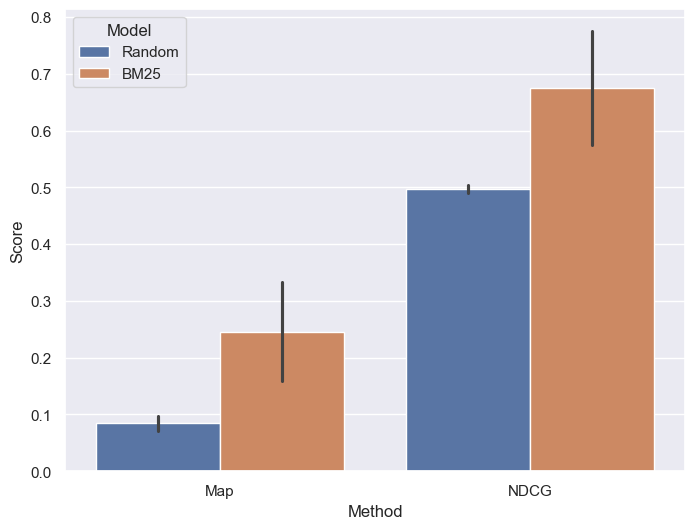

In [112]:
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(8,6)})
data = pd.DataFrame.from_dict({
    'Random': {
        'Model':'Random',
        'Map':random_map,
        'NDCG':random_ndcg
    },
    'Bm25': {
        'Model':'BM25',
        'Map':bm25_map,
        'NDCG':bm25_ndcg
    }
},orient='index')
data= pd.melt(data,id_vars=['Model'],value_vars=['Map','NDCG']).explode('value')
print(data)
data=data.rename(columns = {'Model':'Model','variable':"Method",'value':"Score"})
sns.barplot(data,x='Method',y='Score',hue='Model')